In [56]:

# Bibliotecas Necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm

In [ ]:
# Carregar o dataset com Feature Engineering
file_path = "../dataset/results/ObesityDataSet_featured.csv"
df = pd.read_csv(file_path)

In [51]:
# Visualizar Dataset carregado
print("\n✅ Dataset carregado com sucesso!")
print(df.head())


✅ Dataset carregado com sucesso!
        Age    Height    Weight  FCVC       NCP  CH2O       FAF  TUE  \
0  0.148936  0.320755  0.186567   0.5  0.666667   0.5  0.000000  0.5   
1  0.148936  0.132075  0.126866   1.0  0.666667   1.0  1.000000  0.0   
2  0.191489  0.660377  0.283582   0.5  0.666667   0.5  0.666667  0.5   
3  0.276596  0.660377  0.358209   1.0  0.666667   0.5  0.666667  0.0   
4  0.170213  0.622642  0.379104   0.5  0.000000   0.5  0.000000  0.0   

   Gender_Male  CALC_Frequently  ...  CAEC_no  MTRANS_Bike  MTRANS_Motorbike  \
0        False            False  ...    False        False             False   
1        False            False  ...    False        False             False   
2         True             True  ...    False        False             False   
3         True             True  ...    False        False             False   
4         True            False  ...    False        False             False   

   MTRANS_Public_Transportation  MTRANS_Walking  \
0

In [58]:
# Verificar nome das conulas
print(df.columns)


Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
       'Gender_Male', 'CALC_Frequently', 'CALC_Sometimes', 'CALC_no',
       'FAVC_yes', 'SCC_yes', 'SMOKE_yes',
       'family_history_with_overweight_yes', 'CAEC_Frequently',
       'CAEC_Sometimes', 'CAEC_no', 'MTRANS_Bike', 'MTRANS_Motorbike',
       'MTRANS_Public_Transportation', 'MTRANS_Walking', 'Target_Class', 'IMC',
       'Hydration_Fiber_Ratio', 'Has_Family_History', 'Healthy_Diet_Score'],
      dtype='object')


In [61]:
# 📌 Identificar todas as variáveis alvo relacionadas à obesidade
target_cols = [col for col in df.columns if 'NObeyesdad' in col]
print("\n🎯 Variáveis alvo disponíveis:", target_cols)



🎯 Variáveis alvo disponíveis: []


In [36]:
# 📌 Separar features (X) e variável alvo (y) com todas as classes
X = df.drop(columns=target_cols)  # Mantém apenas as features
y = df[target_cols]  # Mantém todas as classes de obesidade como variáveis alvo

In [27]:
# 📌 Remover colunas categóricas antes da matriz de correlação
X = X.select_dtypes(include=["number"])  # Mantém apenas colunas numéricas

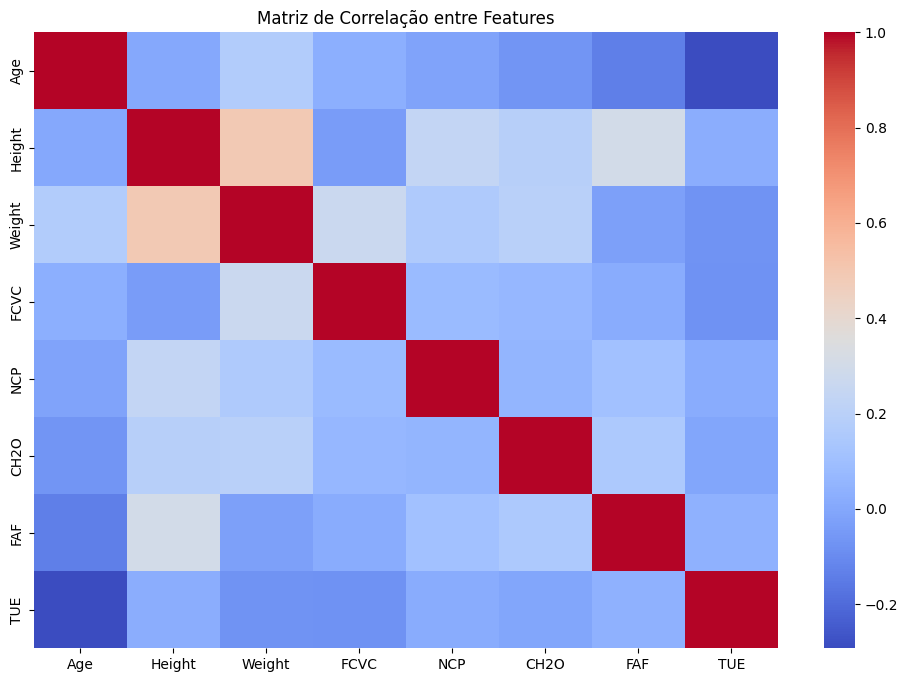

In [28]:
# 📌 Verificar correlação entre as variáveis numéricas
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), annot=False, cmap="coolwarm")
plt.title("Matriz de Correlação entre Features")
plt.show()

In [29]:
# 📌 Identificar features altamente correlacionadas (acima de 0.85)
corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_features = [column for column in upper.columns if any(upper[column] > 0.85)]

print("\n⚠️ Features altamente correlacionadas a serem removidas:", high_corr_features)
X = X.drop(columns=high_corr_features)


⚠️ Features altamente correlacionadas a serem removidas: []


In [39]:
# 📌 Selecionar apenas colunas numéricas para evitar erro no VIF
X_numeric = X.select_dtypes(include=["number"])

In [40]:
# 📌 Remover valores NaN ou infinitos, se existirem
X_numeric.replace([np.inf, -np.inf], np.nan, inplace=True)
X_numeric.dropna(inplace=True)

In [41]:
# 📌 Adicionar constante necessária para calcular o VIF corretamente
X_numeric = sm.add_constant(X_numeric)

In [42]:
# 📌 Aplicar VIF para verificar multicolinearidade
vif_data = pd.DataFrame()
vif_data["Feature"] = X_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(X_numeric.values, i) for i in range(X_numeric.shape[1])]

# 📌 Exibir features com alto VIF
print("\n✅ Variance Inflation Factor (VIF) das features:")
print(vif_data.sort_values(by="VIF", ascending=False))


✅ Variance Inflation Factor (VIF) das features:
                  Feature        VIF
0                   const  52.698982
10  Hydration_Fiber_Ratio  40.229625
6                    CH2O  38.513064
4                    FCVC   4.073078
2                  Height   1.682795
3                  Weight   1.644593
7                     FAF   1.203011
1                     Age   1.154296
8                     TUE   1.103795
5                     NCP   1.086824
9                     IMC   1.025498
11     Has_Family_History        NaN


c:\Users\Matheus\dataMiningObesity\venv\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [48]:
print("\n🔍 Verificando todas as colunas do DataFrame:")
print(df.columns.tolist())  # Lista todas as colunas disponíveis



🔍 Verificando todas as colunas do DataFrame:
['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'Gender_Male', 'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'FAVC_yes', 'SCC_yes', 'SMOKE_yes', 'family_history_with_overweight_yes', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking', 'Target_Class', 'IMC', 'Hydration_Fiber_Ratio', 'Has_Family_History']


In [33]:
# Criar DataFrame com importância das features
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print("\n✅ Importância das Features usando Random Forest:")
print(feature_importances)


✅ Importância das Features usando Random Forest:
                               Feature  Importance
2                               Weight    0.288320
3                                 FCVC    0.142499
8                          Gender_Male    0.091366
0                                  Age    0.078965
1                               Height    0.065398
7                                  TUE    0.050634
4                                  NCP    0.050305
10                      CALC_Sometimes    0.039437
22                   Water_Fiber_Ratio    0.035099
6                                  FAF    0.034861
5                                 CH2O    0.030792
14  family_history_with_overweight_yes    0.020525
20        MTRANS_Public_Transportation    0.017068
16                      CAEC_Sometimes    0.015321
11                            FAVC_yes    0.013588
15                     CAEC_Frequently    0.007860
12                             SCC_yes    0.004939
17                             C

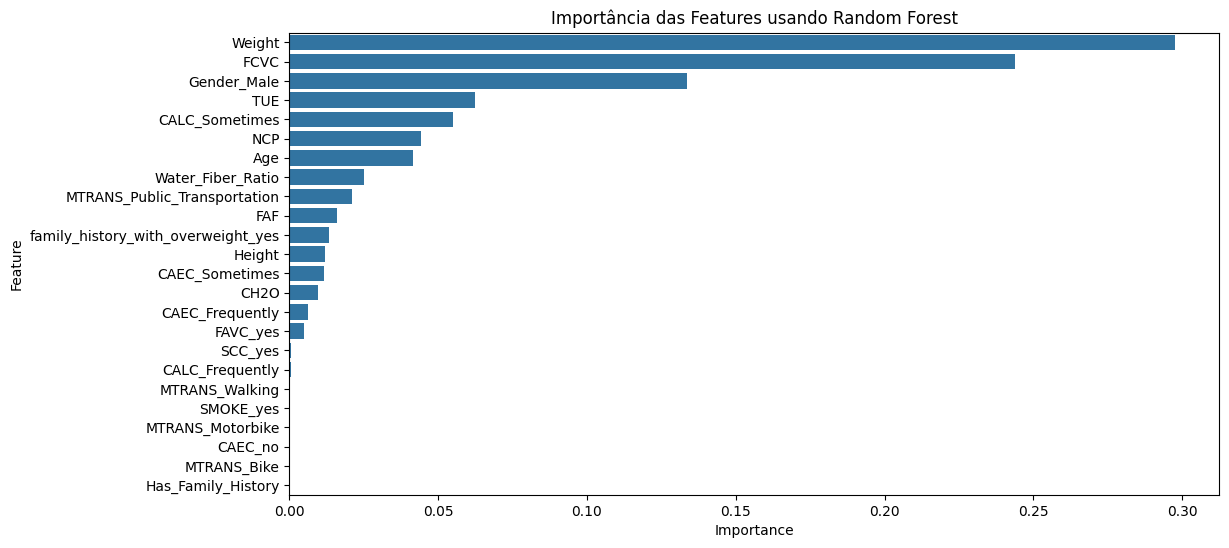

In [47]:
# 📌 Visualizar a importância das features
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title("Importância das Features usando Random Forest")
plt.show()

In [48]:
# 📌 Selecionar as features mais importantes com SelectFromModel
selector = SelectFromModel(model, threshold='mean', prefit=True)
selected_features = X.columns[selector.get_support()]

print("\n✅ Features selecionadas para o modelo final:", selected_features)



✅ Features selecionadas para o modelo final: Index(['Age', 'Weight', 'FCVC', 'NCP', 'TUE', 'Gender_Male', 'CALC_Sometimes'], dtype='object')


In [50]:
# 📌 Criar dataset final com features selecionadas
X_selected = X[selected_features]
df_selected = pd.concat([X_selected, y], axis=1)  # 🔄 Corrigindo a criação do DataFrame


In [54]:
# 📌 Salvar o dataset processado
output_path = "../dataset/raw/ObesityDataSet_selected.csv"
df_selected.to_csv(output_path, index=False)

print("\n✅ Feature Selection Concluído! Arquivo salvo como ObesityDataSet_selected.csv")


✅ Feature Selection Concluído! Arquivo salvo como ObesityDataSet_selected.csv
